In [2]:
# Import the MySQL connector library.
import mysql.connector

# Import the pandas library for data manipulation.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# Establish a connection to the MySQL database.
conn = mysql.connector.connect(
    host='18.136.157.135',  # The hostname of the MySQL server.
    user='dm_team',         # The username to use for authentication.
    password='DM!$Team@&27920!',  # The password to use for authentication.
    database='project_itsm'  # The name of the database to connect to.
)


In [4]:
# Create a cursor object using the cursor() method.
cursor = conn.cursor()  # This allows us to execute SQL queries.

# Define the SQL query to fetch all data from the 'dataset_list' table.
query = "SELECT * FROM dataset_list"


In [5]:
# Execute the SQL query.
cursor.execute(query)  # This sends the query to the database.

# Fetch all rows from the executed query.
rows = cursor.fetchall()  # This retrieves all the rows returned by the query.

# Get the column names from the cursor description.
columns = [desc[0] for desc in cursor.description]  # Extracts column names from the cursor description.


In [6]:
# Create a pandas DataFrame using the fetched data and column names.
df = pd.DataFrame(rows, columns=columns)  # Constructs a DataFrame from the rows and columns.

# Print the DataFrame to inspect the data.
print(df.head())  # Displays the first few rows of the DataFrame for inspection.


     CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact Urgency Priority   number_cnt  ...       Reopen_Time  \
0  Closed      4       4        4  0.601292279  ...                     
1  Closed      3       3        3  0.415049969  ...  02-12-2013 12:31   
2  Closed     NS       3       NA  0.517551335  ...                     
3  Closed      4       4        4  0.642927218  ...                     
4  Closed      4       4        4  0.345258343  ...                     

      Resolved_Time        Close_Time Handle_Time_hrs  \
0  04-11-2013 13:50  04-11-2013 13:

In [7]:
# Close the cursor and the connection to the database.
cursor.close()  # Closes the cursor to free up resources.
conn.close()  # Closes the database connection.


In [8]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [10]:
df.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,...,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,...,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,...,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,...,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [11]:
df.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64

In [12]:
df.dtypes

CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Status                        object
Impact                        object
Urgency                       object
Priority                      object
number_cnt                    object
Category                      object
KB_number                     object
Alert_Status                  object
No_of_Reassignments           object
Open_Time                     object
Reopen_Time                   object
Resolved_Time                 object
Close_Time                    object
Handle_Time_hrs               object
Closure_Code                  object
No_of_Related_Interactions    object
Related_Interaction           object
No_of_Related_Incidents       object
No_of_Related_Changes         object
Related_Change                object
dtype: object

In [13]:
# Define the columns to convert to numeric.
numeric_columns = ['number_cnt', 'Impact', 'Urgency', 'Priority','No_of_Reassignments', 'No_of_Related_Interactions', 'No_of_Related_Incidents', 'No_of_Related_Changes']

# Convert the specified columns to numeric.
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
# Define the columns to convert to datetime.
datetime_columns = ['Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time']

# Convert the specified columns to datetime.
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [15]:
# Define the columns to convert to category.
category_columns = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Category', 'KB_number', 'Alert_Status', 'Closure_Code', 'Related_Interaction', 'Related_Change']

# Convert the specified columns to category.
for col in category_columns:
    df[col] = df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  category      
 1   CI_Cat                      46606 non-null  category      
 2   CI_Subcat                   46606 non-null  category      
 3   WBS                         46606 non-null  category      
 4   Incident_ID                 46606 non-null  category      
 5   Status                      46606 non-null  category      
 6   Impact                      45226 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  category      
 11  KB_number                   46606 non-null  category  

In [17]:
df.dtypes

CI_Name                             category
CI_Cat                              category
CI_Subcat                           category
WBS                                 category
Incident_ID                         category
Status                              category
Impact                               float64
Urgency                              float64
Priority                             float64
number_cnt                           float64
Category                            category
KB_number                           category
Alert_Status                        category
No_of_Reassignments                  float64
Open_Time                     datetime64[ns]
Reopen_Time                   datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_hrs                       object
Closure_Code                        category
No_of_Related_Interactions           float64
Related_Interaction                 category
No_of_Rela

In [18]:
df.head(10)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4.0,4.0,0.601292,...,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3.0,3.0,0.415050,...,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NaN,3.0,NaN,0.517551,...,NaT,NaT,NaT,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4.0,4.0,0.642927,...,NaT,NaT,NaT,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4.0,4.0,0.345258,...,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4.0,4.0,4.0,0.006676,...,NaT,2013-08-11 13:54:00,2013-08-11 13:54:00,"3,38,34,36,944",Other,1.0,SD0000031,NaN,NaN,
6,WBA000082,application,Web Based Application,WBS000055,IM0000014,Closed,4.0,4.0,4.0,0.192907,...,NaT,NaT,NaT,"3,70,31,91,389",Unknown,1.0,SD0000033,NaN,NaN,
7,WBA000124,application,Web Based Application,WBS000088,IM0000015,Closed,4.0,4.0,4.0,0.996468,...,NaT,2013-08-11 14:09:00,2013-08-11 14:09:00,"3,29,46,24,167",Other,1.0,SD0000034,NaN,NaN,
8,WBA000124,application,Web Based Application,WBS000088,IM0000017,Closed,NaN,3.0,NaN,0.269574,...,NaT,2013-08-11 14:02:00,2013-08-11 14:02:00,"0,862777778",Other,1.0,SD0000036,NaN,NaN,
9,WBA000082,application,Web Based Application,WBS000055,IM0000018,Closed,4.0,4.0,4.0,0.306670,...,NaT,2013-08-11 14:33:00,2013-08-11 14:35:00,"3,21,15,26,944",No error - works as designed,1.0,SD0000037,NaN,NaN,


In [19]:
df.describe()

,Impact,Urgency,Priority,number_cnt,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46605.000000,45226.000000,46606.000000,46605.000000,18612,871,17577,18333,46492.000000,1222.000000,560.000000
mean,4.223632,4.189529,4.215805,0.499658,1.131831,2013-12-10 03:34:32.927143680,2013-12-11 16:45:50.493685504,2013-12-16 11:14:11.138419200,2013-12-15 14:00:49.795450880,1.149897,1.669394,1.058929
min,1.000000,1.000000,1.000000,0.000023,0.000000,2012-01-10 10:49:00,2013-01-10 09:58:00,2013-01-10 06:45:00,2013-01-10 06:45:00,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,0.248213,0.000000,2013-06-11 11:40:45,2013-06-12 13:19:30,2013-06-11 14:56:00,2013-06-11 13:59:00,1.000000,1.000000,1.000000
50%,4.000000,4.000000,4.000000,0.500269,0.000000,2013-11-12 13:00:30,2013-11-11 14:15:00,2013-12-11 08:38:00,2013-12-11 07:53:00,1.000000,1.000000,1.000000
75%,5.000000,5.000000,5.000000,0.749094,2.000000,2014-06-02 18:22:30,2014-06-03 13:45:30,2014-06-03 15:03:00,2014-06-03 14:27:00,1.000000,1.000000,1.000000
max,5.000000,5.000000,5.000000,0.999997,46.000000,2014-12-03 22:58:00,2014-12-03 17:24:00,2014-12-03 17:56:00,2014-12-03 17:56:00,370.000000,63.000000,9.000000
std,0.705474,0.724743,0.705624,0.288634,2.269774,NaN,NaN,NaN,NaN,2.556338,3.339687,0.403596


In [20]:
import numpy as np

# Replace placeholders or incorrect values (e.g., 'NA', 'NS') with NaN.
# This helps in identifying missing or incorrect data easily.
df.replace(['NA', 'NS'], np.nan, inplace=True)



In [21]:
# Inspect the DataFrame to see the effects of type conversion and replacement.
print("Data types after conversion:")
df.dtypes



Data types after conversion:


CI_Name                             category
CI_Cat                              category
CI_Subcat                           category
WBS                                 category
Incident_ID                         category
Status                              category
Impact                               float64
Urgency                              float64
Priority                             float64
number_cnt                           float64
Category                            category
KB_number                           category
Alert_Status                        category
No_of_Reassignments                  float64
Open_Time                     datetime64[ns]
Reopen_Time                   datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_hrs                       object
Closure_Code                        category
No_of_Related_Interactions           float64
Related_Interaction                 category
No_of_Rela

In [22]:
# Print the DataFrame to inspect the changes and ensure preprocessing is done correctly.
print("First few rows of the DataFrame after preprocessing:")
df.head()



First few rows of the DataFrame after preprocessing:


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4.0,4.0,0.601292,...,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3.0,3.0,0.415050,...,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NaN,3.0,NaN,0.517551,...,NaT,NaT,NaT,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4.0,4.0,0.642927,...,NaT,NaT,NaT,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4.0,4.0,0.345258,...,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,


In [23]:
# Print summary statistics to check the overall state of the data.
print("Summary statistics of the DataFrame:")
df.describe(include='all')

Summary statistics of the DataFrame:


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,45226.000000,46605.000000,45226.000000,46606.000000,...,871,17577,18333,46606,46606,46492.000000,46606,1222.000000,560.000000,46606
unique,3019,13,65,274,46606,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30639,15,NaN,43060,NaN,NaN,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,Other,NaN,#MULTIVALUE,NaN,NaN,
freq,3050,32900,18811,13342,1,46597,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,236,16470,NaN,3434,NaN,NaN,46046
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.223632,4.189529,4.215805,0.499658,...,2013-12-11 16:45:50.493685504,2013-12-16 11:14:11.138419200,2013-12-15 14:00:49.795450880,NaN,NaN,1.149897,NaN,1.669394,1.058929,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000023,...,2013-01-10 09:58:00,2013-01-10 06:45:00,2013-01-10 06:45:00,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,0.248213,...,2013-06-12 13:19:30,2013-06-11 14:56:00,2013-06-11 13:59:00,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,4.000000,0.500269,...,2013-11-11 14:15:00,2013-12-11 08:38:00,2013-12-11 07:53:00,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,0.749094,...,2014-06-03 13:45:30,2014-06-03 15:03:00,2014-06-03 14:27:00,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,0.999997,...,2014-12-03 17:24:00,2014-12-03 17:56:00,2014-12-03 17:56:00,NaN,NaN,370.000000,NaN,63.000000,9.000000,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  category      
 1   CI_Cat                      46606 non-null  category      
 2   CI_Subcat                   46606 non-null  category      
 3   WBS                         46606 non-null  category      
 4   Incident_ID                 46606 non-null  category      
 5   Status                      46606 non-null  category      
 6   Impact                      45226 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  category      
 11  KB_number                   46606 non-null  category  

In [25]:
# Import necessary libraries for EDA.
import matplotlib.pyplot as plt
import seaborn as sns

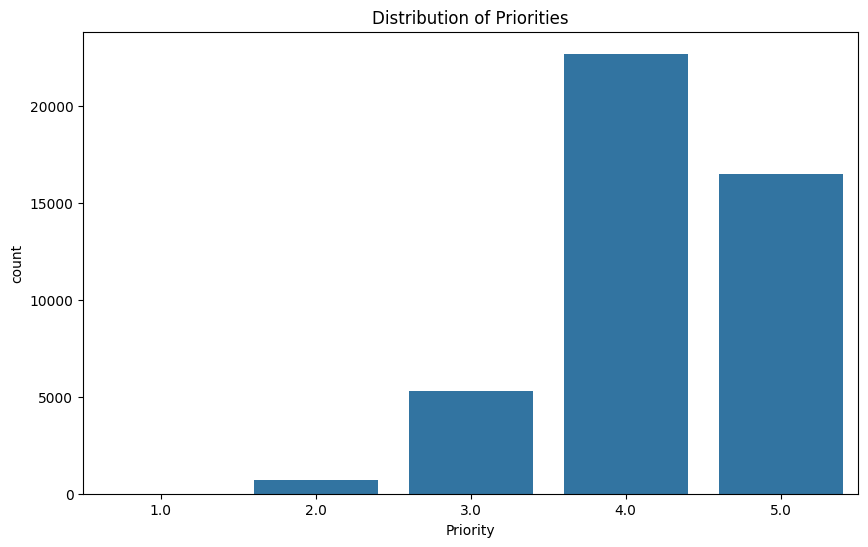

In [26]:
# Plot the distribution of the 'Priority' column.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Priority')
plt.title('Distribution of Priorities')
plt.show()



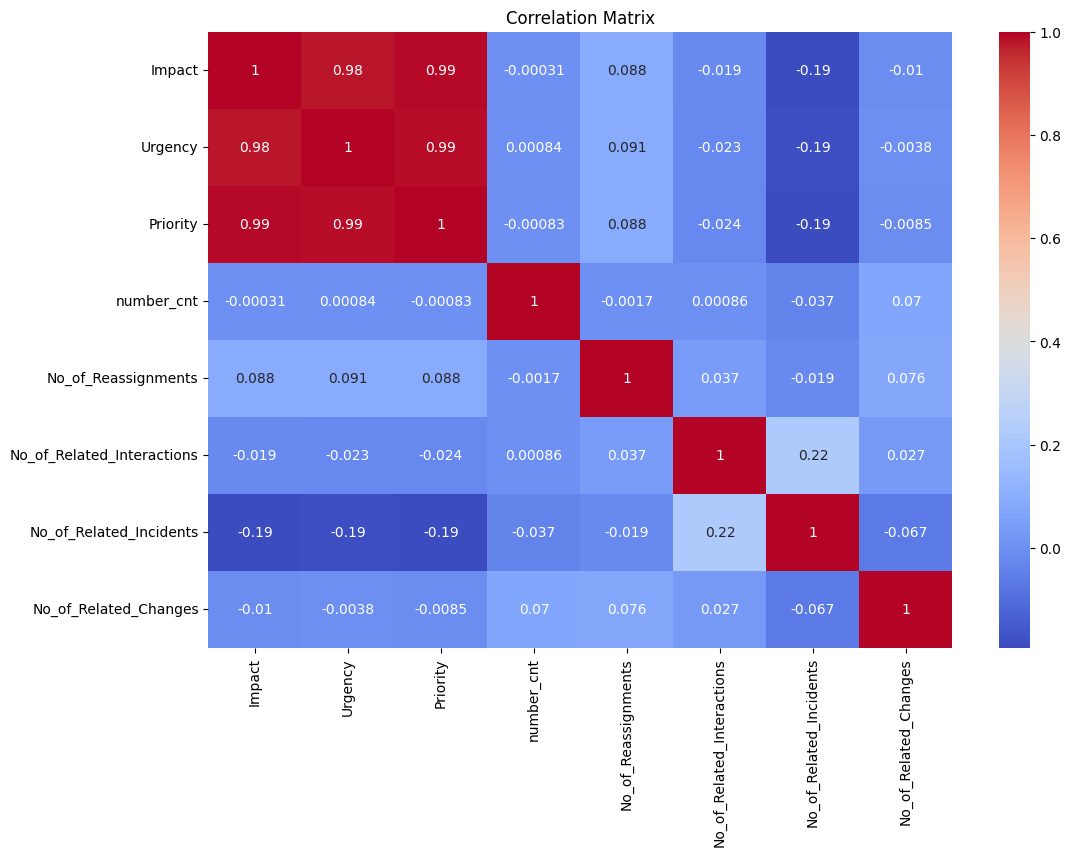

In [27]:
# Select only the numeric columns for the correlation matrix.
numeric_df = df.select_dtypes(include=[np.number])

# Plot a heatmap of the correlation matrix.
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

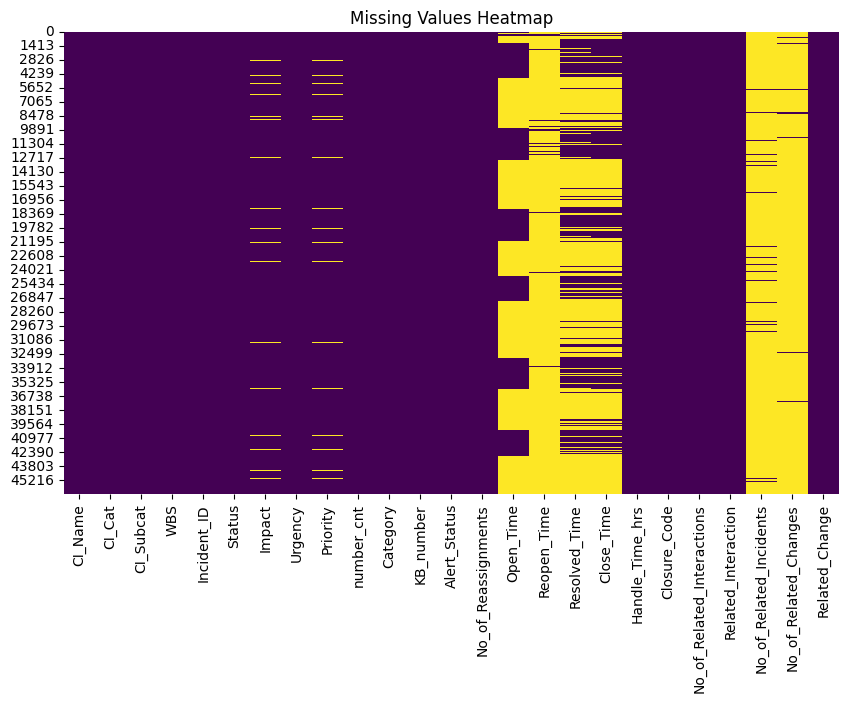

In [29]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

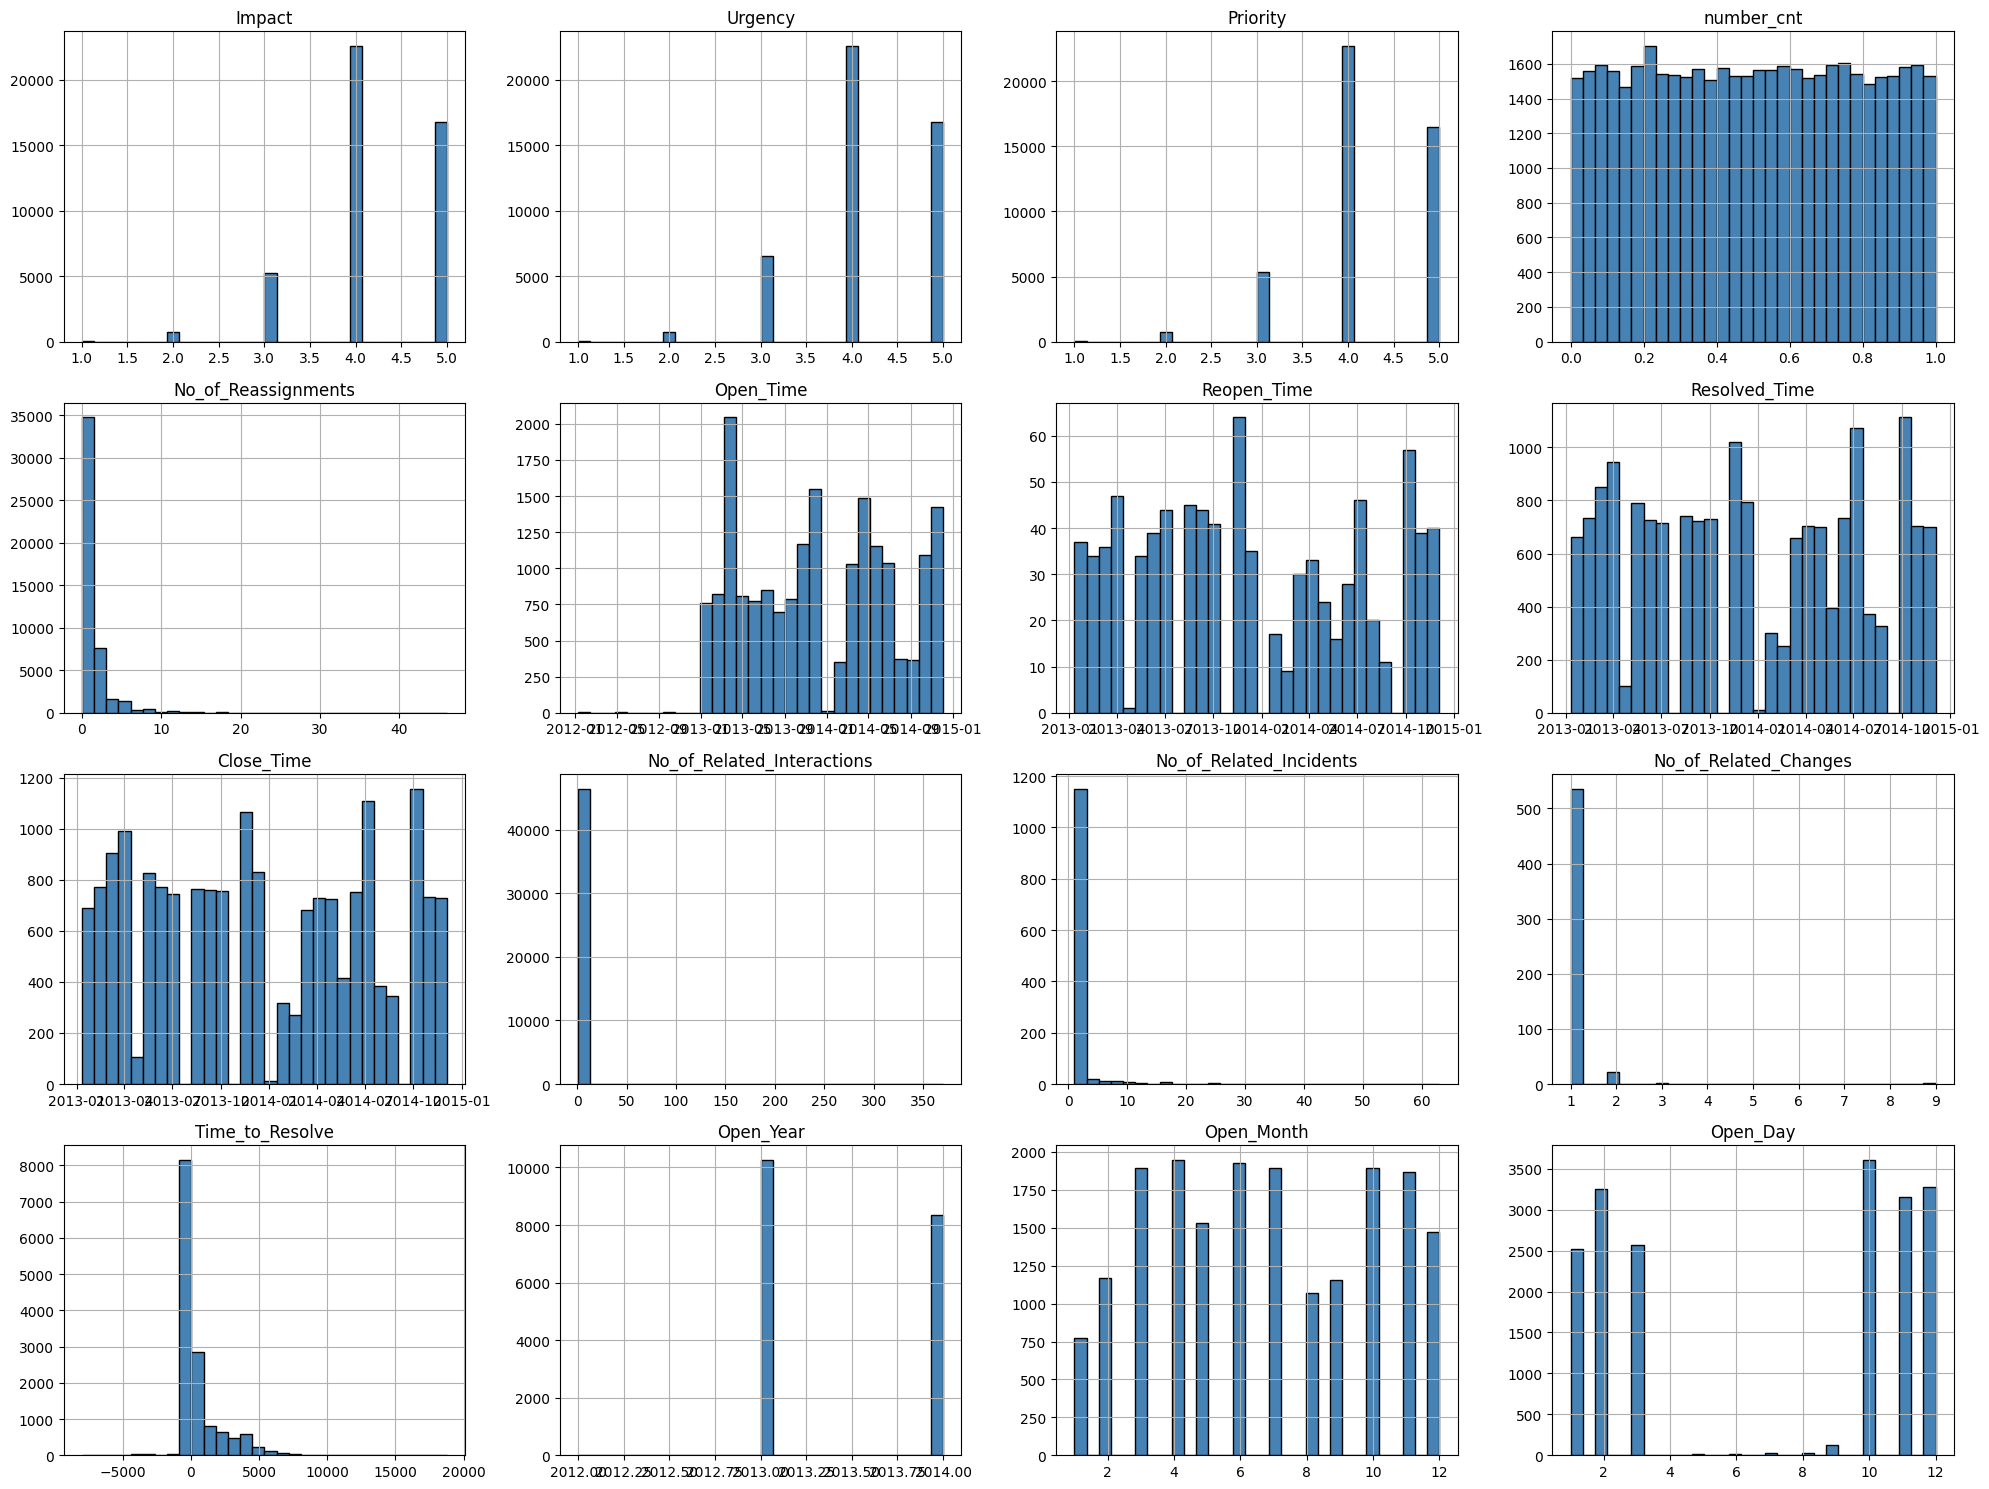

In [37]:
# Univariate Analysis
# Histograms
df.hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black')
plt.tight_layout()
plt.show()



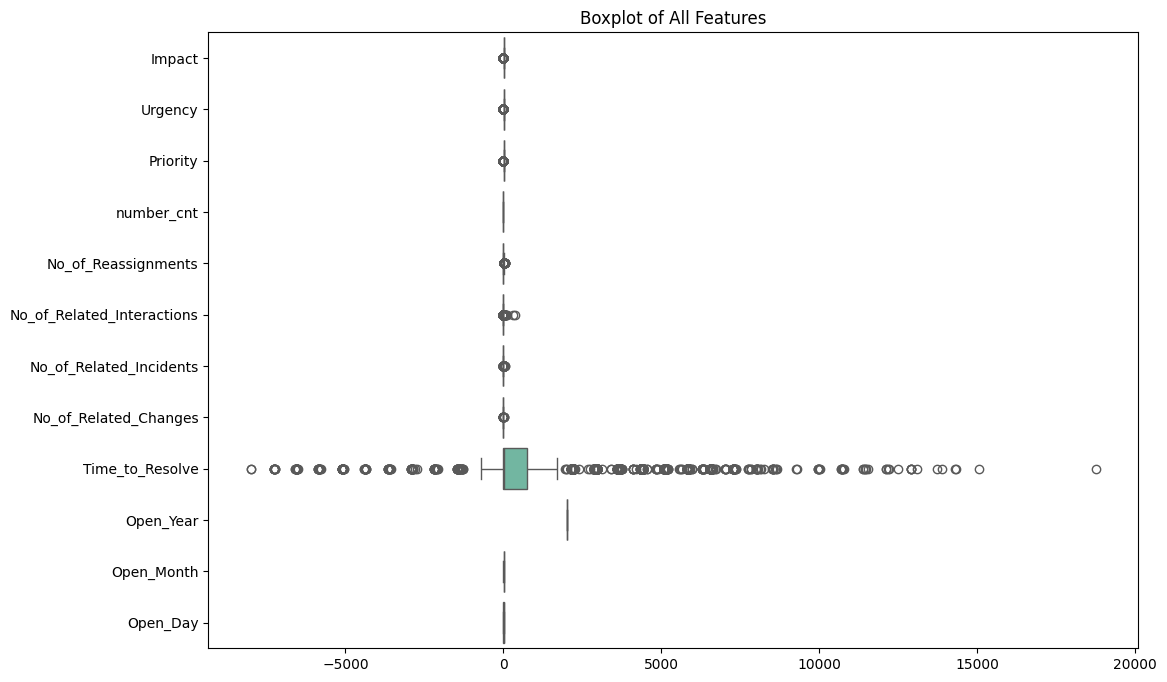

In [39]:
# Boxplots for identifying outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Boxplot of All Features')
plt.show()



C:\Users\carrefour\AppData\Local\Temp\ipykernel_5604\3420939943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Priority', data=df, palette='Set2')


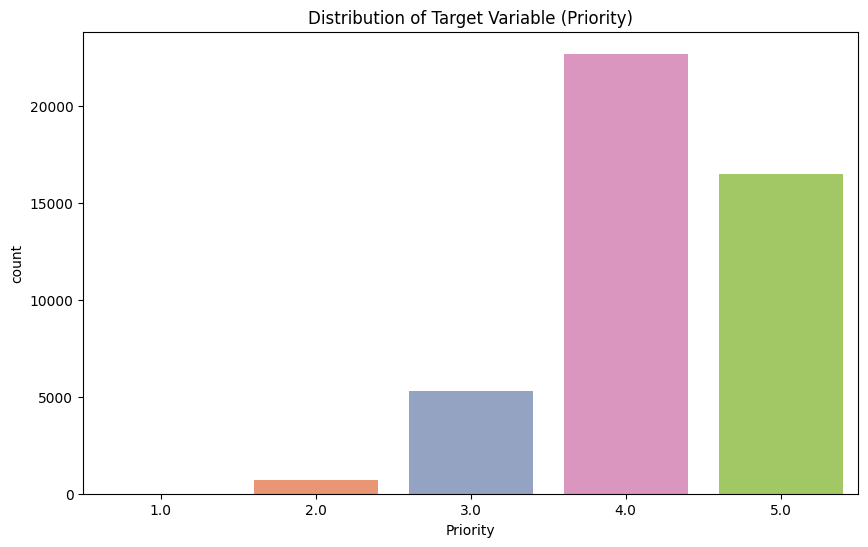

In [40]:
# Countplot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Priority', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Priority)')
plt.show()

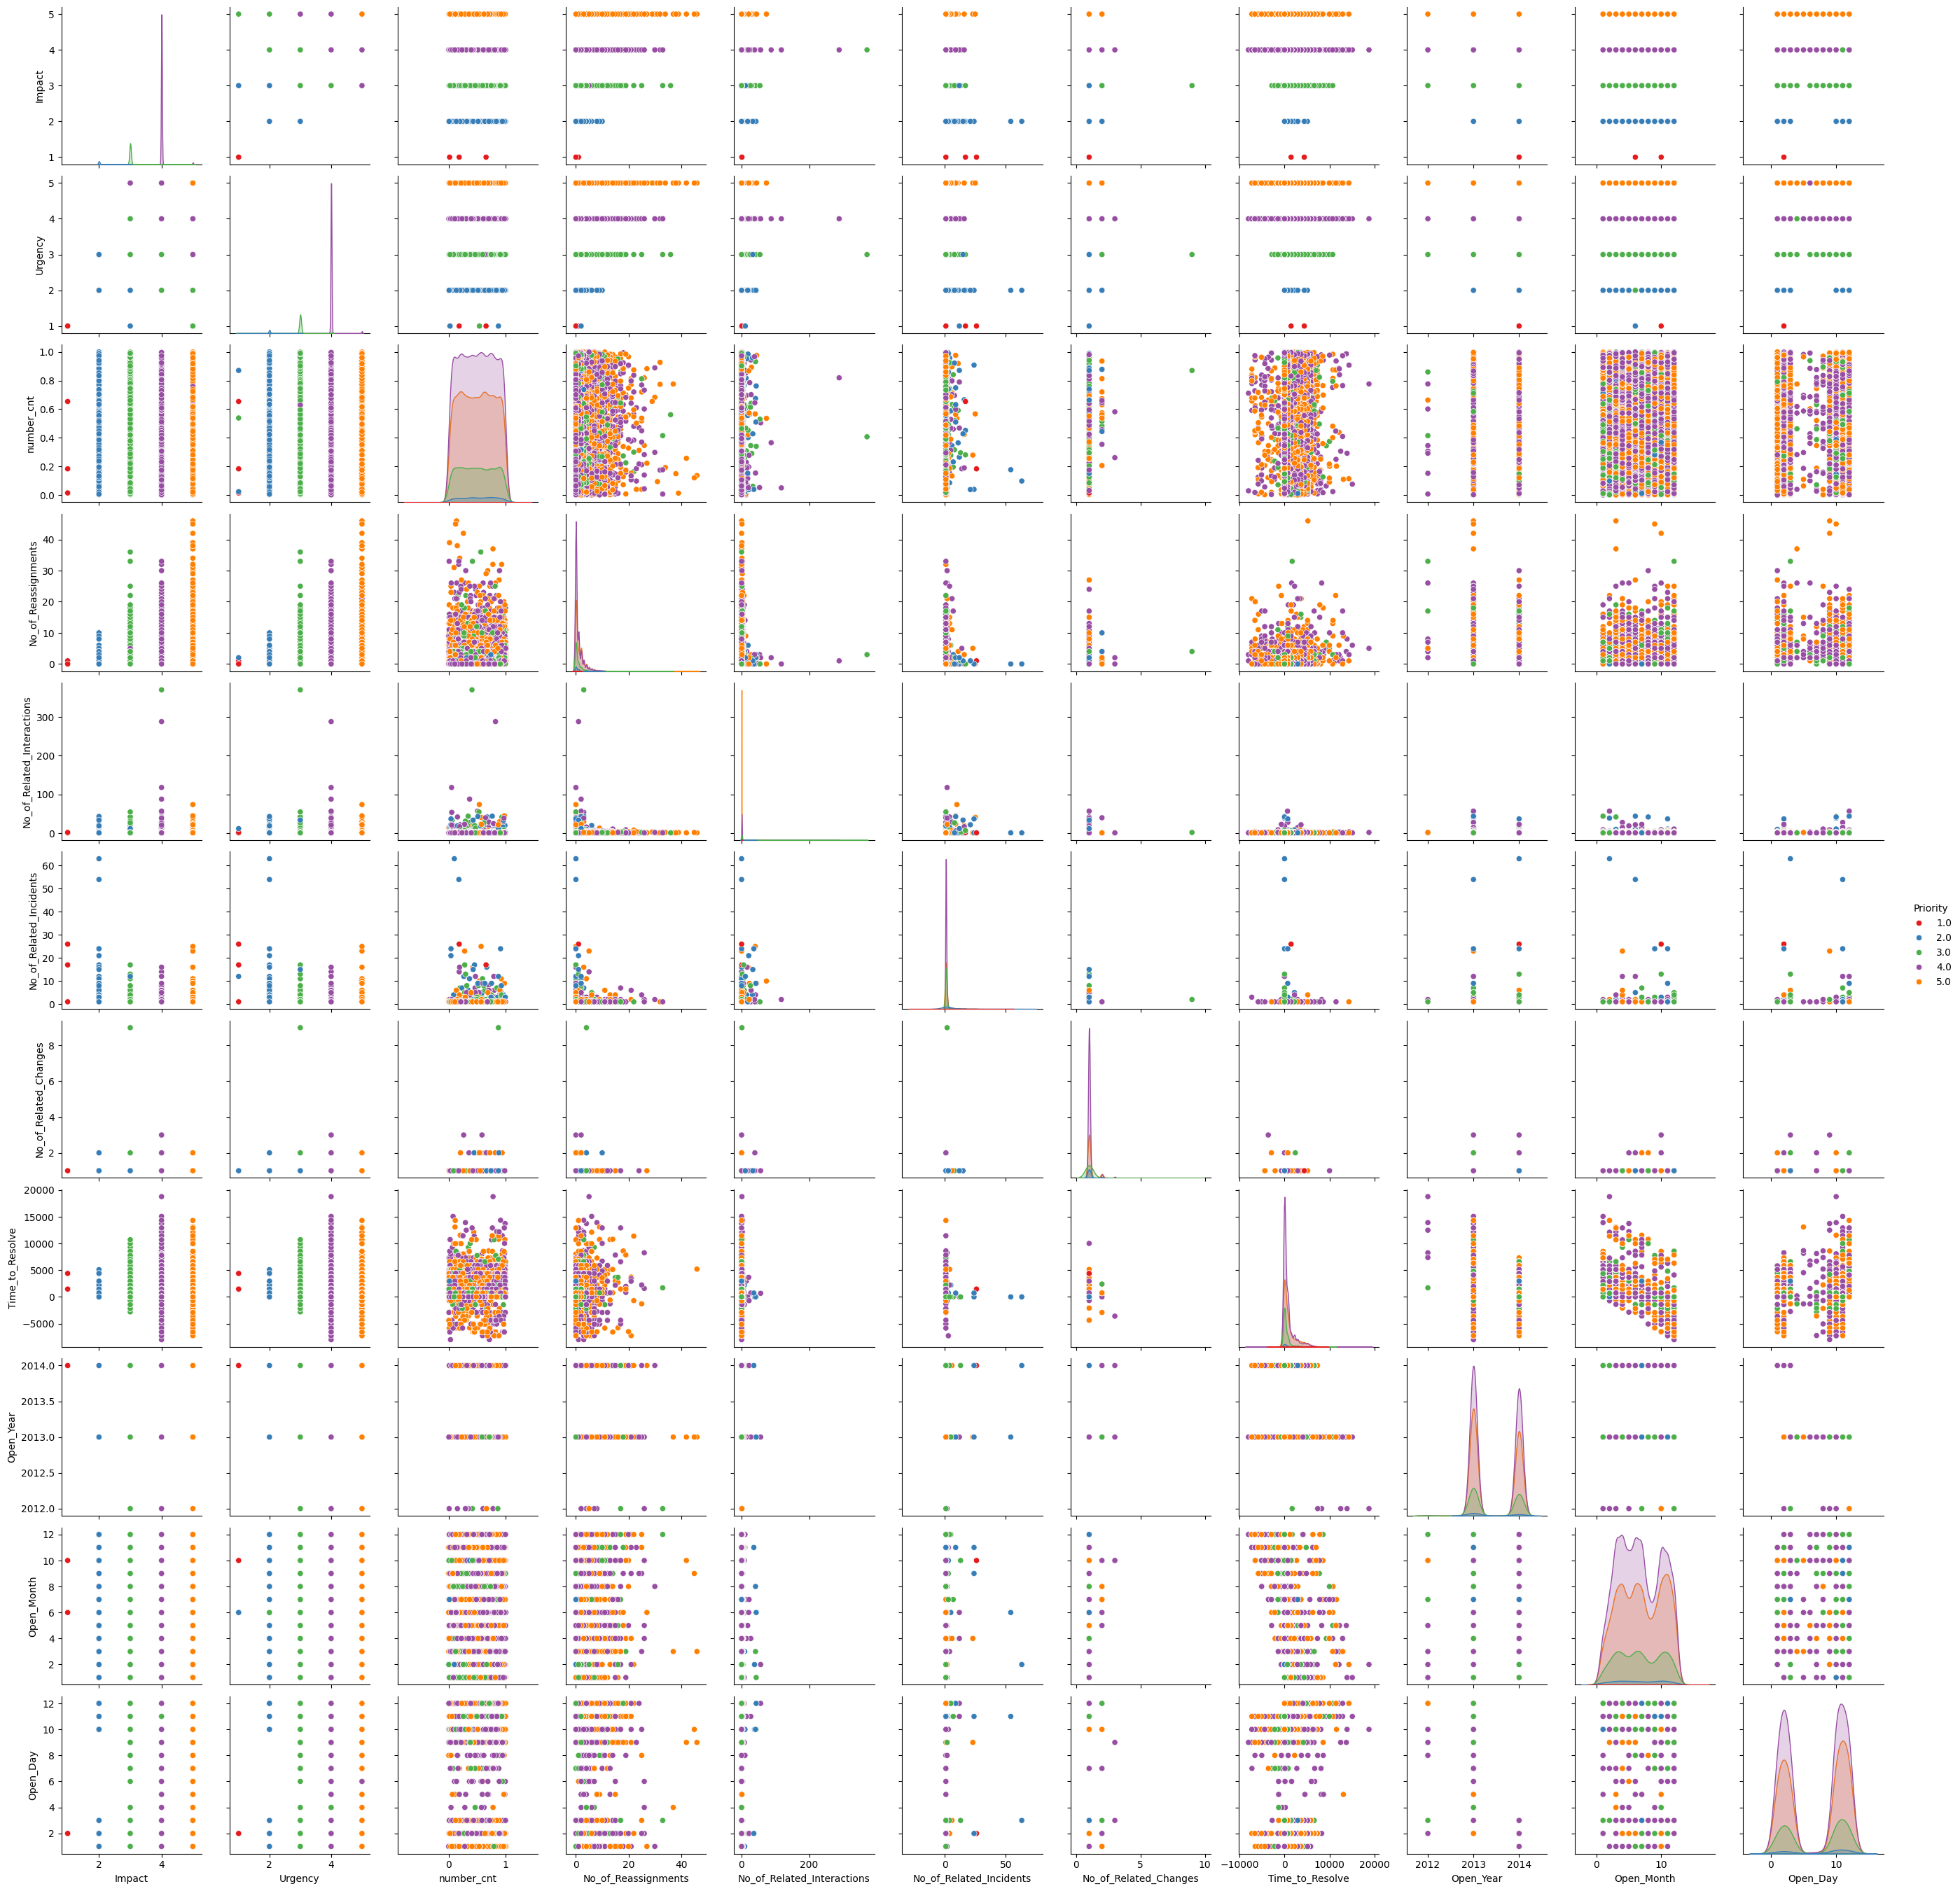

In [41]:
# Bivariate Analysis
# Scatter Plot
sns.pairplot(df, hue='Priority', palette='Set1')
plt.show()

C:\Users\carrefour\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


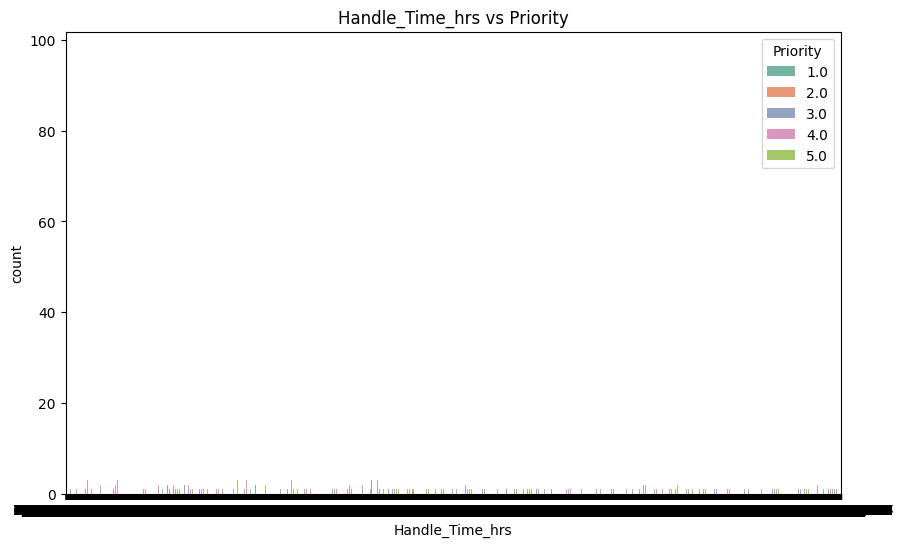

In [43]:
# Bar plot for categorical variables with the target variable
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Priority', data=df, palette='Set2')
    plt.title(f'{column} vs Priority')
    plt.show()


In [54]:
# Generate new feature: Time to Resolve (in hours).
df['Time_to_Resolve'] = (df['Resolved_Time'] - df['Open_Time']).dt.total_seconds() / 3600



In [55]:
# Extract year, month, and day from 'Open_Time'.
df['Open_Year'] = df['Open_Time'].dt.year
df['Open_Month'] = df['Open_Time'].dt.month
df['Open_Day'] = df['Open_Time'].dt.day



In [56]:
# Select relevant features for modeling.
selected_features = ['Impact', 'Urgency', 'Priority', 'No_of_Reassignments', 'Time_to_Resolve', 'Open_Year', 'Open_Month', 'Open_Day']
df_selected = df[selected_features]

# Print the selected features DataFrame to inspect.
df_selected.head()

,Impact,Urgency,Priority,No_of_Reassignments,Time_to_Resolve,Open_Year,Open_Month,Open_Day
0,4.0,4.0,4.0,26.0,8256.300000,2012.0,5.0,2.0
1,3.0,3.0,3.0,33.0,1700.866667,2012.0,12.0,3.0
2,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,13.0,NaN,NaN,NaN,NaN
4,4.0,4.0,4.0,2.0,7370.900000,2012.0,10.0,8.0


In [57]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Time_to_Resolve,Open_Year,Open_Month,Open_Day
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4.0,4.0,0.601292,...,Other,1.0,SD0000007,2.0,NaN,,8256.300000,2012.0,5.0,2.0
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3.0,3.0,0.415050,...,Software,1.0,SD0000011,1.0,NaN,,1700.866667,2012.0,12.0,3.0
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NaN,3.0,NaN,0.517551,...,No error - works as designed,1.0,SD0000017,NaN,NaN,,NaN,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4.0,4.0,0.642927,...,Operator error,1.0,SD0000025,NaN,NaN,,NaN,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4.0,4.0,0.345258,...,Other,1.0,SD0000029,NaN,NaN,,7370.900000,2012.0,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4.0,4.0,4.0,0.231896,...,Other,1.0,SD0147021,NaN,NaN,,NaN,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4.0,4.0,4.0,0.805153,...,User error,1.0,SD0146967,NaN,NaN,,NaN,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5.0,5.0,5.0,0.917466,...,Hardware,1.0,SD0146982,NaN,NaN,,NaN,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4.0,4.0,4.0,0.701278,...,Software,1.0,SD0146986,NaN,NaN,,NaN,NaN,NaN,NaN


In [58]:
# Import necessary libraries for model training.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import joblib


In [62]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Category', 'KB_number', 'Alert_Status', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'Related_Interaction', 'Related_Change'],
      dtype='object')


In [63]:
data_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)


MemoryError: Unable to allocate 2.02 GiB for an array with shape (46606, 46606) and data type bool

In [64]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


C:\Users\carrefour\AppData\Local\Temp\ipykernel_5604\522725219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
C:\Users\carrefour\AppData\Local\Temp\ipykernel_5604\522725219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoders[column].fit_transform(data[column])
C:\Users\carrefour\AppData\Local\Temp\ipykernel_5604\522725219.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [65]:
X = data.drop('Priority', axis=1)  # Replace 'Priority' with your target variable name
y = data['Priority']  # Replace 'Priority' with your target variable name

# Check if all columns in X are numeric
print(X.dtypes)


CI_Name                         int32
CI_Cat                          int32
CI_Subcat                       int32
WBS                             int32
Incident_ID                     int32
Status                          int32
Impact                        float64
Urgency                       float64
number_cnt                    float64
Category                        int32
KB_number                       int32
Alert_Status                    int32
No_of_Reassignments           float64
Open_Time                       int64
Reopen_Time                     int64
Resolved_Time                   int64
Close_Time                      int64
Handle_Time_hrs                 int32
Closure_Code                    int32
No_of_Related_Interactions    float64
Related_Interaction             int32
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
Related_Change                  int32
Time_to_Resolve               float64
Open_Year                     float64
Open_Month  

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = sorted(list(set(y_test) | set(y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [9322, 9046]

In [67]:
# Check for missing values in the target variable
missing_target = df['Priority'].isnull().sum()
print(f"Missing values in the target variable: {missing_target}")

# If there are missing values, drop the rows with missing target values
if missing_target > 0:
    data = df.dropna(subset=['Priority'])

# Separate the features and target variable
X = df.drop('Priority', axis=1)
y = df['Priority']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier without parallel processing
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = sorted(list(set(y_test) | set(y_pred)))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Missing values in the target variable: 1380


ValueError: could not convert string to float: 'DTA000057'

In [ ]:
# Import necessary libraries for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data.
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV.
print('Best Parameters:', grid_search.best_params_)

# Evaluate the best estimator on the test set.
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Model Accuracy:', accuracy_score(y_test, y_pred_best))
print('Best Model Classification Report:\n', classification_report(y_test, y_pred_best))



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Accuracy: 0.9997789078045545
Best Model Classification Report:
               precision    recall  f1-score   support

         2.0       1.00      0.99      1.00       132
         3.0       1.00      1.00      1.00      1067
         4.0       1.00      1.00      1.00      4515
         5.0       1.00      1.00      1.00      3332

    accuracy                           1.00      9046
   macro avg       1.00      1.00      1.00      9046
weighted avg       1.00      1.00      1.00      9046



In [ ]:
# Save the trained model to a file for deployment.
import joblib

# Save the model to a file.
joblib.dump(best_model, 'incident_priority_model.pkl')

# Load the model from the file (for later use).
loaded_model = joblib.load('incident_priority_model.pkl')

# Make predictions using the loaded model (to ensure it works correctly).
y_pred_loaded = loaded_model.predict(X_test)
print('Loaded Model Accuracy:', accuracy_score(y_test, y_pred_loaded))


Loaded Model Accuracy: 0.9997789078045545
